In [289]:
import os

import requests 
from bs4 import BeautifulSoup
import re

import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на', 'изза', 'также', 'поэтому'])

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/adam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
datasetLength = 500
itterLen = 0
pd.set_option('display.max_rows',datasetLength)
df = pd.DataFrame(columns=['news','rubric'], index = range(datasetLength))

In [51]:
# set start and stop date like this -> "2022/03/01"

def parsing(startDate, stopDate, itterLen, datasetLength):
    
    start = datetime.strptime(startDate, "%Y/%m/%d")
    stop = datetime.strptime(stopDate, "%Y/%m/%d")
    while start < stop:
        start = start + timedelta(days=1) 
        now = start.strftime("%Y/%m/%d")

        a_s=BeautifulSoup(requests.get(f"http://lenta.ru/{now}/").text, "html5lib").find_all("a")

        links=["http://lenta.ru"+x for x in re.findall('<a class="titles" href="(.+?)/"', str(a_s))]
        for i in range(len(links)):
            if itterLen == datasetLength-1:
                return

            txt = BeautifulSoup(requests.get(links[i]).text, "html.parser").find_all("div")
            rubric = re.findall('<a class="topic-header[^.]+href="/rubrics/[a-zA-Z]+/">(.+?)</a>', str(txt))

            if len(rubric) <= 1:
                continue
            else:
                article = BeautifulSoup(" ".join([p.text for p in BeautifulSoup(requests.get(links[i]).text, "html.parser").find_all("p")]), "html5lib").get_text().replace("\xa0", " ")
                df.loc[itterLen].news = article
                df.loc[itterLen].rubric = rubric[0]
                itterLen += 1

In [52]:
parsing("2022/03/01", "2022/03/07", itterLen, datasetLength)

In [58]:
df = df.dropna() 
df

,news,rubric
0,Фото: Instagram Международная федерация смешан...,Спорт
1,Фото: Andrew Kelly / Reuters Работа мобильного...,Экономика
2,Кадр: Neuralink / YouTube В середине февраля з...,Наука и техника
3,Фото: РИА Новости О продолжении переговоров Ро...,Мир
4,Фото: Dado Ruvic / Reuters Компания Apple объя...,Наука и техника
5,Фото: Dado Ruvic / Reuters Компания Apple объя...,Наука и техника
6,"Фото: Г. Хренов / ТАСС Китайцы, которые в 1969...",Россия
7,Фото: Yulii Zozulia / Keystone Press Agency / ...,Бывший СССР
8,Джо Байден. Фото: Kevin Lamarque / Reuters Пре...,Мир
9,Фото: Максим Шеметов / Reuters Эстония не буде...,Бывший СССР


In [64]:
for i in df['rubric'].value_counts().index:
    df[df['rubric'] == i].to_csv(f"./dataset/df_{i}.csv", index=False, encoding="utf-8")

In [230]:
spark = SparkSession.builder\
    .master("local[*]")\
    .appName("Hw2WordCount")\
    .getOrCreate()

In [231]:
sc = spark.sparkContext

In [232]:
def lower_clean_str(x):
    punc='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~-—1234567890«»'
    lowercased_str = x.lower()
    for w in punc:
        lowercased_str = lowercased_str.replace(w, '')
    return lowercased_str

In [233]:
mainRDD = spark.sparkContext.emptyRDD()
rubrics_arr = []
rubrics_RDD = spark.sparkContext.emptyRDD()

for root,dirs,files in os.walk("./dataset/"):
    for file in files:
        if file.endswith(".csv"):
            rdd = sc.textFile(f'./dataset/{file}')
            rdd = rdd.map(lower_clean_str)
            rdd = rdd.flatMap(lambda x: x.split(" "))
            rdd = rdd.filter(lambda x: x != '')
            rdd_count = rdd.map(lambda word: (word,1))
            rdd_count_RBK = rdd_count.reduceByKey(lambda x,y: (x+y)).sortByKey()
            rdd_count_RBK = rdd_count_RBK.filter(lambda x: x[0] not in stopwords)
            mainRDD = mainRDD.union(rdd_count_RBK).reduceByKey(lambda x,y: (x+y))  
            # Count the most frequent word in each file
            rdd_toeach_file = rdd_count_RBK.map(lambda x:(x[1],x[0])).sortByKey(False)
            rdd_toeach_file = rdd_toeach_file.map(lambda col: (col[0],col[1], str(file))).take(1)
            rubrics_arr.append(rdd_toeach_file[0])

In [234]:
mainRDD = mainRDD.map(lambda x:(x[1],x[0])).sortByKey(False)
result_total = spark.createDataFrame(mainRDD).toPandas()
result_total.columns = ['count', 'word']
result_total.to_csv("./result/result.csv", sep=',', header=True)

In [291]:
mainRDD.take(15)

[(321, 'россии'),
 (163, 'фото'),
 (102, 'марта'),
 (97, 'украине'),
 (95, 'которые'),
 (91, 'ранее'),
 (89, 'сша'),
 (88, 'украины'),
 (85, 'года'),
 (80, 'заявил'),
 (76, 'февраля'),
 (71, 'компании'),
 (71, 'словам'),
 (70, 'кошко'),
 (67, 'новости')]

In [264]:
result_total.agg({'count': 'sum'})

count    31731
dtype: int64

In [256]:
rubrics_RDD = spark.sparkContext.emptyRDD()
rubrics_RDD = rubrics_RDD.union(spark.sparkContext.parallelize(rubrics_arr))
result_toeach_file = spark.createDataFrame(rubrics_RDD).toPandas()
result_toeach_file.columns = ['count', 'word', 'file']
result_toeach_file.file = result_toeach_file.file.str.replace('df_', '').str.replace('.csv', '')
result_toeach_file.to_csv("./result/result_toeach_file.csv", sep=',', header=True)
result_toeach_file

,count,word,file
0,70,кошко,Силовые структуры
1,8,организации,Спорт
2,32,фильм,Культура
3,72,россии,Экономика
4,15,россии,Путешествия
5,5,рублей,Моя страна
6,130,россии,Мир
7,31,компании,Наука и техника
8,24,россии,Интернет и СМИ
9,32,украины,Бывший СССР


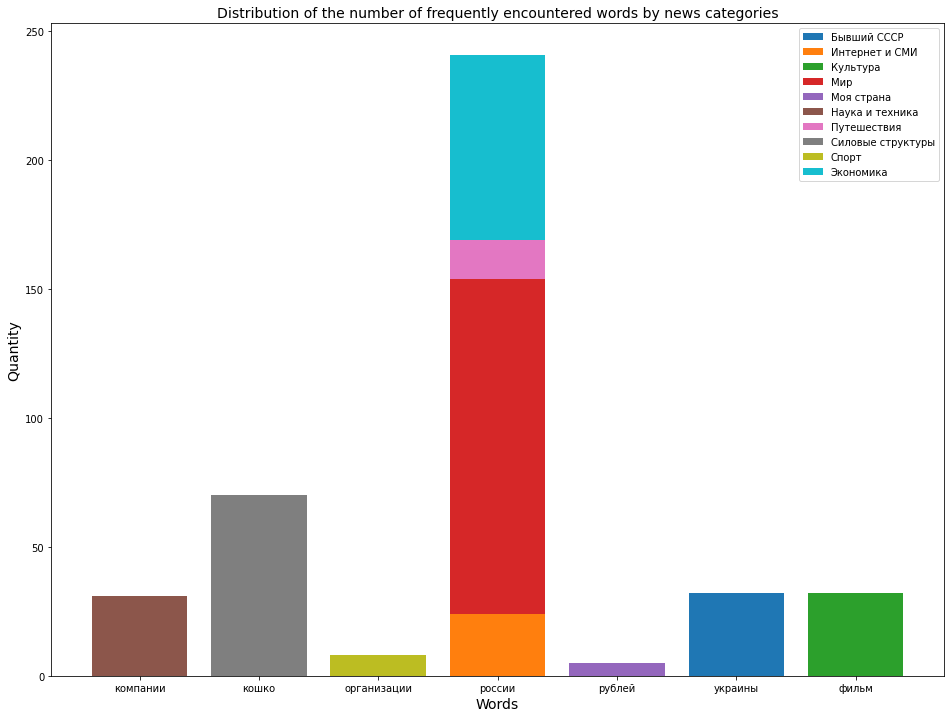

In [260]:
fig, ax = plt.subplots(figsize=(16,12))

agg_tips = result_toeach_file.groupby(['word', 'file'])['count'].sum().unstack().fillna(0)

# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(agg_tips))

colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(agg_tips.index))]

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
for i, col in enumerate(agg_tips.columns):
    ax.bar(agg_tips.index, agg_tips[col], bottom=bottom, label=col)
    bottom += np.array(agg_tips[col])


ax.legend()
ax.set_title('Distribution of the number of frequently encountered words by news categories', fontsize = 14)
ax.set_ylabel('Quantity', fontsize = 14)
ax.set_xlabel('Words', fontsize = 14);

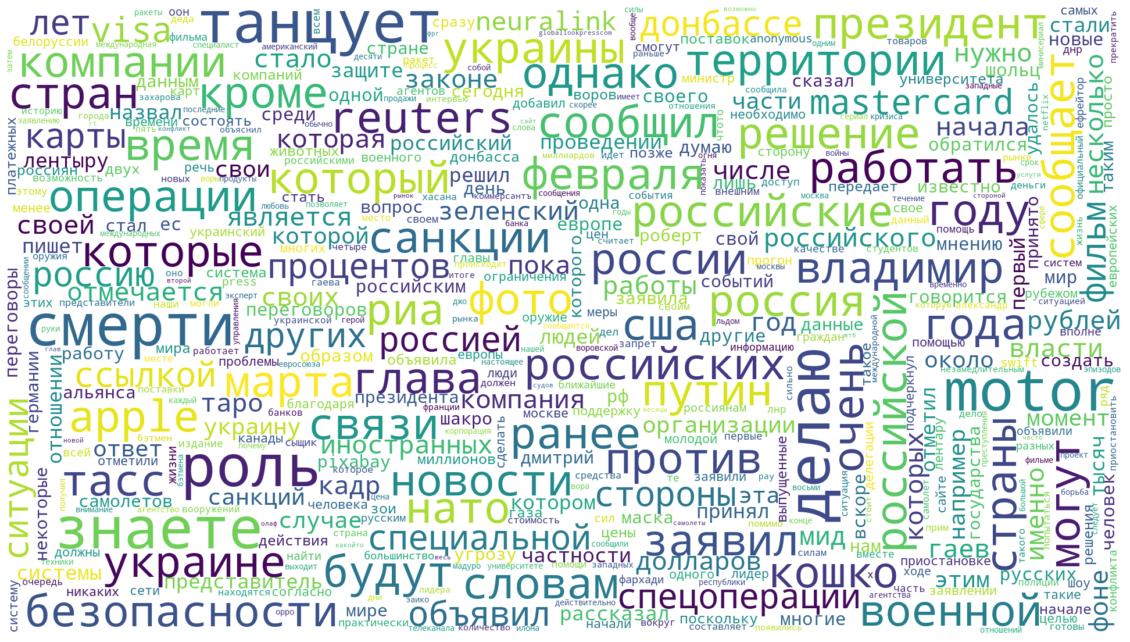

In [288]:
from wordcloud import WordCloud
# Make a string from all dataframe
text = ' '.join(result_total.word.to_numpy())

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1920
                      , height = 1080
                      , max_font_size=100
                      , max_words=500
                      , background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()